In [7]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a = 5
b = 7
c = a + b

In [8]:
fruit = c("a",'b','c')

In [9]:
print(fruit)

[1] "a" "b" "c"


In [10]:
print(c)

[1] 12


**Exercise 1: Diabetes**

In [11]:
#https://drive.google.com/file/d/1bel8M_sqvngc2T9zv1PsQOGrDqwVWXi7/view?usp=sharing
system('gdown --id 1bel8M_sqvngc2T9zv1PsQOGrDqwVWXi7')

In [13]:
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [14]:
mydata <- read.csv("diabetes.csv")

In [15]:
## view the first few rows of the data
print(head(mydata))

# print(tail(mydata))
print(summary(mydata))

  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           6     148            72            35       0 33.6
2           1      85            66            29       0 26.6
3           8     183            64             0       0 23.3
4           1      89            66            23      94 28.1
5           0     137            40            35     168 43.1
6           5     116            74             0       0 25.6
  DiabetesPedigreeFunction Age Outcome
1                    0.627  50       1
2                    0.351  31       0
3                    0.672  32       1
4                    0.167  21       0
5                    2.288  33       1
6                    0.201  30       0
  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   

In [16]:
print(str(mydata))

print(paste("cols:",ncol(mydata)))
print(paste("rows:",nrow(mydata)))

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...
NULL
[1] "cols: 9"
[1] "rows: 768"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



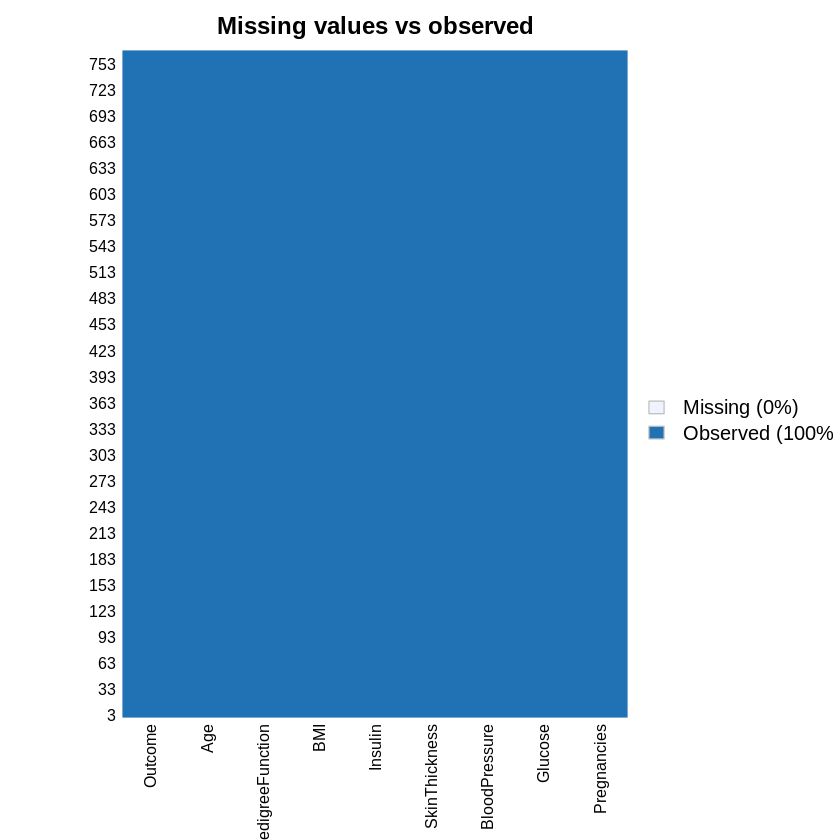

In [18]:
# check missing value
install.packages('Amelia')
library(Amelia)
missmap(mydata, main = "Missing values vs observed")
# => no missing values

In [19]:
# Check Class bias
print(table(mydata$Outcome))



  0   1 
500 268 


In [20]:
correlations <- cor(mydata[,1:9])
print(correlations)

                         Pregnancies    Glucose BloodPressure SkinThickness
Pregnancies               1.00000000 0.12945867    0.14128198   -0.08167177
Glucose                   0.12945867 1.00000000    0.15258959    0.05732789
BloodPressure             0.14128198 0.15258959    1.00000000    0.20737054
SkinThickness            -0.08167177 0.05732789    0.20737054    1.00000000
Insulin                  -0.07353461 0.33135711    0.08893338    0.43678257
BMI                       0.01768309 0.22107107    0.28180529    0.39257320
DiabetesPedigreeFunction -0.03352267 0.13733730    0.04126495    0.18392757
Age                       0.54434123 0.26351432    0.23952795   -0.11397026
Outcome                   0.22189815 0.46658140    0.06506836    0.07475223
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.07353461 0.01768309              -0.03352267
Glucose                   0.33135711 0.22107107               0.13733730
BloodPressure        

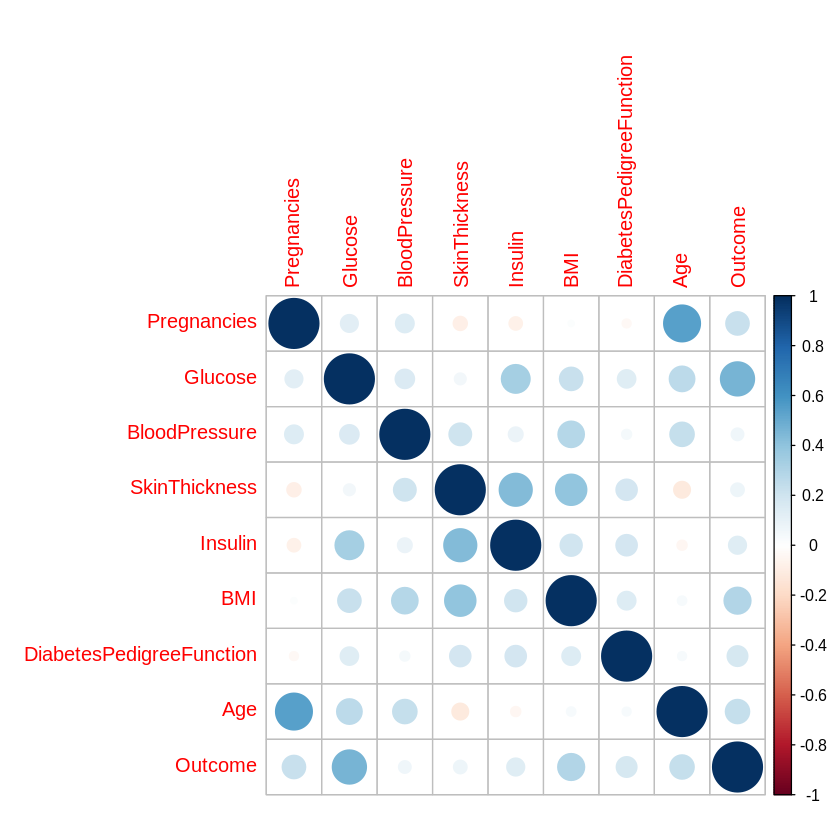

In [21]:
corrplot(correlations, method="circle")

In [22]:
# divided into train and test: 70 - 30
n = nrow(mydata)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = mydata[trainIndex ,]
test = mydata[-trainIndex ,]
print("Rows of training data and test data:")
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data:"
[1] 538
[1] 230


In [23]:
# estimates a logistic regression model using the glm (generalized linear model)
mylogit <- glm(Outcome ~ ., data = train, family = "binomial")
print(summary(mylogit))


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2121  -0.7166  -0.3751   0.7034   2.9678  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.4781186  0.9246172 -10.251  < 2e-16 ***
Pregnancies               0.1104755  0.0389728   2.835  0.00459 ** 
Glucose                   0.0361864  0.0046218   7.830 4.90e-15 ***
BloodPressure            -0.0113348  0.0064381  -1.761  0.07831 .  
SkinThickness            -0.0056012  0.0087186  -0.642  0.52059    
Insulin                  -0.0001959  0.0010964  -0.179  0.85822    
BMI                       0.1085052  0.0195900   5.539 3.05e-08 ***
DiabetesPedigreeFunction  1.5378231  0.3719235   4.135 3.55e-05 ***
Age                       0.0172798  0.0113577   1.521  0.12816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 

In [24]:
pred = predict(mylogit,
newdata = test,
type = "response")
pred_value <- ifelse(pred > 0.5, 1, 0)
print("Testdata admit vs predict (10 rows:)")
result <- data.frame(testAdmit = test$Outcome[30:40], pred_value[30:40])
print(result)

print(pred_value[30:40])
print(test$Outcome[30:40])



[1] "Testdata admit vs predict (10 rows:)"
    testAdmit pred_value.30.40.
94          1                 0
101         1                 1
103         0                 0
105         0                 0
107         0                 0
110         1                 0
113         0                 0
114         0                 0
117         1                 0
120         0                 0
121         1                 1
 94 101 103 105 107 110 113 114 117 120 121 
  0   1   0   0   0   0   0   0   0   0   1 
 [1] 1 1 0 0 0 1 0 0 1 0 1


In [25]:
# SOLUTION 1
accuracy <- table(pred_value, test[,"Outcome"])
accuracy = sum(diag(accuracy))/sum(accuracy)
print(paste("Accuracy s1:", accuracy))

# SOLUTION 2
misClasificError <- mean(pred_value != test$Outcome)
print(paste('Accuracy s2: ',1-misClasificError))

[1] "Accuracy s1: 0.760869565217391"
[1] "Accuracy s2:  0.760869565217391"


In [26]:
summary(mylogit)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2121  -0.7166  -0.3751   0.7034   2.9678  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.4781186  0.9246172 -10.251  < 2e-16 ***
Pregnancies               0.1104755  0.0389728   2.835  0.00459 ** 
Glucose                   0.0361864  0.0046218   7.830 4.90e-15 ***
BloodPressure            -0.0113348  0.0064381  -1.761  0.07831 .  
SkinThickness            -0.0056012  0.0087186  -0.642  0.52059    
Insulin                  -0.0001959  0.0010964  -0.179  0.85822    
BMI                       0.1085052  0.0195900   5.539 3.05e-08 ***
DiabetesPedigreeFunction  1.5378231  0.3719235   4.135 3.55e-05 ***
Age                       0.0172798  0.0113577   1.521  0.12816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 

In [28]:
# make new prediction
#. 8, 176, 90, 34, 300, 33.7, 0.467, 58
#. 1, 100, 66, 15, 56, 23.6, 0.666, 26
#. 12, 88, 74, 40, 54, 35.3, 0.378, 48
print(colnames(test))
y1 <- predict(mylogit,
newdata = data.frame(Pregnancies = c(8, 1, 12),
Glucose = c(176, 100, 88),
BloodPressure = c(90, 66, 74),
SkinThickness = c(34, 15, 40),
Insulin = c(300, 56, 54),
BMI = c(33.7, 23.6, 35.3),
DiabetesPedigreeFunction = c(0.467, 0.666, 0.3),
Age = c(58, 26, 48)),
type='response')
y1 <- ifelse(y1 > 0.5, 1, 0)
print("results:")
print(y1)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 
[1] "results:"
1 2 3 
1 0 0 
